3(a) :

In [ ]:
import pandas as pd
import numpy as np

# Loading the provided MultiLabelData dataset
data = pd.read_csv('/content/MultiLabelData.csv')

# Extract features (first 294 columns) and labels (last 6 columns)
X = data.iloc[:, :-6].values  # First 294 columns for features
Y = data.iloc[:, -6:].values  # Last 6 columns for labels

print(f"Features shape: {X.shape}, Labels shape: {Y.shape}")


Features shape: (2406, 294), Labels shape: (2406, 6)


3(b) :

In [ ]:
from sklearn.model_selection import train_test_split

# First, split 70% (S1) for training, 30% temporary (S2 + S3)
X_S1, X_temp, Y_S1, Y_temp = train_test_split(X, Y, test_size=0.30, random_state=42)

# Now split the 30% temporary set into 15% validation (S2) and 15% test (S3)
X_S2, X_S3, Y_S2, Y_S3 = train_test_split(X_temp, Y_temp, test_size=0.50, random_state=42)

print(f"Training Set (S1) size: X={X_S1.shape}, Y={Y_S1.shape}")
print(f"Validation Set (S2) size: X={X_S2.shape}, Y={Y_S2.shape}")
print(f"Test Set (S3) size: X={X_S3.shape}, Y={Y_S3.shape}")


Training Set (S1) size: X=(1684, 294), Y=(1684, 6)
Validation Set (S2) size: X=(361, 294), Y=(361, 6)
Test Set (S3) size: X=(361, 294), Y=(361, 6)


In [ ]:
def label_distribution(Y):
    label_counts = np.sum(Y, axis=0)
    total_samples = Y.shape[0]
    for i in range(Y.shape[1]):
        print(f"Label {i+1}: {label_counts[i]}/{total_samples} positive samples")

# Print label distributions for each set
print("\nLabel distribution in Training Set (S1):")
label_distribution(Y_S1)

print("\nLabel distribution in Validation Set (S2):")
label_distribution(Y_S2)

print("\nLabel distribution in Test Set (S3):")
label_distribution(Y_S3)



Label distribution in Training Set (S1):
Label 1: 305/1684 positive samples
Label 2: 240/1684 positive samples
Label 3: 268/1684 positive samples
Label 4: 294/1684 positive samples
Label 5: 385/1684 positive samples
Label 6: 312/1684 positive samples

Label distribution in Validation Set (S2):
Label 1: 66/361 positive samples
Label 2: 60/361 positive samples
Label 3: 59/361 positive samples
Label 4: 68/361 positive samples
Label 5: 67/361 positive samples
Label 6: 64/361 positive samples

Label distribution in Test Set (S3):
Label 1: 55/361 positive samples
Label 2: 64/361 positive samples
Label 3: 70/361 positive samples
Label 4: 71/361 positive samples
Label 5: 80/361 positive samples
Label 6: 55/361 positive samples


3(c) :

In [ ]:
# Split the data into features (first 294 columns) and labels (last 6 columns)
X = data[:, :-6]  # Features
Y = data[:, -6:]  # Labels

# Check the shapes of X and Y
print("Features shape:", X.shape)
print("Labels shape:", Y.shape)

# Shuffle and split the data into S1 (70%), S2 (15%), and S3 (15%)
def shuffle_and_split(X, Y, train_size=0.7, val_size=0.15):
    n_samples = X.shape[0]
    indices = np.random.permutation(n_samples)

    train_end = int(train_size * n_samples)
    val_end = int(val_size * n_samples) + train_end

    S1_indices = indices[:train_end]
    S2_indices = indices[train_end:val_end]
    S3_indices = indices[val_end:]

    S1_X, S1_Y = X[S1_indices], Y[S1_indices]
    S2_X, S2_Y = X[S2_indices], Y[S2_indices]
    S3_X, S3_Y = X[S3_indices], Y[S3_indices]

    return (S1_X, S1_Y), (S2_X, S2_Y), (S3_X, S3_Y)

# Split the data
(S1_X, S1_Y), (S2_X, S2_Y), (S3_X, S3_Y) = shuffle_and_split(X, Y)

# Check the label distributions
def label_distribution(Y, split_name):
    print(f"Label distribution for {split_name}:")
    for label_idx in range(Y.shape[1]):
        label_counts = np.bincount(Y[:, label_idx].astype(int))
        zero_count = label_counts[0] if 0 in label_counts else 0
        one_count = label_counts[1] if 1 in label_counts else 0
        print(f"  Label {label_idx + 1}: 0s = {zero_count}, 1s = {one_count}")

print("S1 (Training Set)")
label_distribution(S1_Y, "S1 (Training Set)")

print("\nS2 (Validation Set)")
label_distribution(S2_Y, "S2 (Validation Set)")

print("\nS3 (Test Set)")
label_distribution(S3_Y, "S3 (Test Set)")


Features shape: (2406, 294)
Labels shape: (2406, 6)
S1 (Training Set)
Label distribution for S1 (Training Set):
  Label 1: 0s = 0, 1s = 0
  Label 2: 0s = 0, 1s = 0
  Label 3: 0s = 0, 1s = 0
  Label 4: 0s = 0, 1s = 0
  Label 5: 0s = 0, 1s = 0
  Label 6: 0s = 0, 1s = 0

S2 (Validation Set)
Label distribution for S2 (Validation Set):
  Label 1: 0s = 0, 1s = 0
  Label 2: 0s = 0, 1s = 0
  Label 3: 0s = 0, 1s = 0
  Label 4: 0s = 0, 1s = 0
  Label 5: 0s = 0, 1s = 0
  Label 6: 0s = 0, 1s = 0

S3 (Test Set)
Label distribution for S3 (Test Set):
  Label 1: 0s = 0, 1s = 0
  Label 2: 0s = 0, 1s = 0
  Label 3: 0s = 0, 1s = 0
  Label 4: 0s = 0, 1s = 0
  Label 5: 0s = 0, 1s = 0
  Label 6: 0s = 0, 1s = 0


## Neural Network Architecture:

### Input Layer:
The input layer consists of 294 neurons, corresponding to the 294 features present in each sample of the dataset.

### Hidden Layers:
The network includes 3 to 4 hidden layers, each featuring a suitable number of neurons and utilizing ReLU (Rectified Linear Unit) activation functions. The choice of ReLU in the hidden layers is advantageous because:
- It mitigates the vanishing gradient problem.
- It introduces non-linearity, enabling the network to capture complex relationships within the data.
- It is computationally efficient and has become a standard choice in deep learning applications.

### Output Layer:
The output layer contains 6 neurons, one for each label. It employs the Sigmoid activation function for the following reasons:
- Sigmoid outputs values between 0 and 1, making it suitable for binary classification tasks.
- Each label is binary (either 0 or 1), and the Sigmoid function effectively converts the raw output into probabilities.

### Loss Function:
The network utilizes binary cross-entropy as its loss function. This loss function is well-suited for multi-label classification tasks where each label is treated independently, addressing the binary classification of each label effectively. It penalizes incorrect predictions in a manner that enhances model performance for each label.


In [ ]:
import numpy as np

class Neural_Network():
    def __init__(self, neurons, activations, initialization='randn'):
        """
        Args:
            neurons (list): Number of neurons in each layer, e.g., [input_size, hidden1, hidden2, ..., output_size]
            activations (list): Activation functions for each layer, e.g., ['ReLU', 'ReLU', 'Sigmoid']
            initialization (str): Weight initialization method, 'randn' for random normal, 'rand' for uniform
        """
        self.inputSize = neurons[0]
        self.outputSize = neurons[-1]
        self.layers = len(neurons)
        self.weights = []
        self.biases = []
        self.layer_activations = activations

        # Weight initialization
        if initialization == 'rand':
            self.initializer = np.random.rand
        elif initialization == 'randn':
            self.initializer = np.random.randn
        else:
            raise ValueError("initialization must be 'rand' or 'randn'")

        # Initialize weights and biases with small random values
        for i in range(len(neurons) - 1):
            self.weights.append(self.initializer(neurons[i + 1], neurons[i]) * 0.01)  # Smaller weights
            self.biases.append(self.initializer(neurons[i + 1], 1) * 0.01)  # Smaller biases

    # Sigmoid function
    def sigmoid(self, z):
        z = np.clip(z, -500, 500)  # Clip to avoid overflow in exp
        return 1 / (1 + np.exp(-z))

    # Derivative of sigmoid
    def sigmoidPrime(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    # ReLU activation
    def ReLU(self, z):
        return np.maximum(0, z)

    # Derivative of ReLU
    def ReLUPrime(self, z):
        return np.where(z > 0, 1, 0)

    # Binary cross-entropy loss function
    def loss_binary_cross_entropy(self, predicted, actual):
        predicted = np.clip(predicted, 1e-15, 1 - 1e-15)  # Avoid log(0)
        return -np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))

    # Forward pass through the network
    def forward(self, x):
        layer_activations = [x]
        a = x
        layer_dot_prod_z = []
        for i, (b, w) in enumerate(zip(self.biases, self.weights)):
            z = np.dot(w, a) + b  # z = Wx + b
            activation_func = self.layer_activations[i].lower()  # Activation function

            if activation_func == 'relu':
                a = self.ReLU(z)
            elif activation_func == 'sigmoid':
                a = self.sigmoid(z)

            layer_dot_prod_z.append(z)
            layer_activations.append(a)

        return a, layer_dot_prod_z, layer_activations

    # Backward pass (backpropagation)
    def backward(self, x, y, zs, activations):
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]

        # Derivative of loss with respect to the last layer's activation
        delta = (activations[-1] - y)  # delta = a_L - y
        grad_b[-1] = np.sum(delta, axis=1, keepdims=True)
        grad_w[-1] = np.dot(delta, activations[-2].T)

        # Backpropagate through the hidden layers
        for l in range(2, self.layers):
            z = zs[-l]
            activation_func = self.layer_activations[-l].lower()

            if activation_func == 'sigmoid':
                sp = self.sigmoidPrime(z)
            elif activation_func == 'relu':
                sp = self.ReLUPrime(z)

            delta = np.dot(self.weights[-l + 1].T, delta) * sp
            grad_b[-l] = np.sum(delta, axis=1, keepdims=True)
            grad_w[-l] = np.dot(delta, activations[-l - 1].T)

        return grad_b, grad_w

    # Update the weights and biases using gradients
    def update_parameters(self, grads, lr):
        grad_b, grad_w = grads
        for i in range(len(self.weights)):
            self.weights[i] -= lr * grad_w[i]
            self.biases[i] -= lr * grad_b[i]

    # Training the neural network
    def train(self, X, Y, lr=1e-4, max_epochs=1000):
        train_errors = []
        for epoch in range(max_epochs):
            preds, zs, activations = self.forward(X)

            # Compute loss
            loss = self.loss_binary_cross_entropy(preds, Y)
            train_errors.append(loss)

            # Backward pass (backpropagation)
            grads = self.backward(X, Y, zs, activations)

            # Update weights and biases
            self.update_parameters(grads, lr)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss}")

        return train_errors

    # Prediction function with custom threshold
    def predict(self, x, threshold=0.5):
        preds, _, _ = self.forward(x)
        return preds > threshold  # Apply threshold


# Define the architecture of the network
D_in, H1, H2, H3, D_out = 294, 256, 128, 64, 6  # Input = 294 features, Output = 6 labels (multi-label)

neurons = [D_in, H1, H2, H3, D_out]  # Architecture
activation_functions = ['ReLU', 'ReLU', 'ReLU', 'Sigmoid']  # Activations for each layer

# Initialize the neural network
nn = Neural_Network(neurons, activation_functions)

# Example: Train the network on S1_X (features) and S1_Y (labels)
# Assuming S1_X is the feature matrix and S1_Y is the label matrix
# losses = nn.train(S1_X.T, S1_Y.T, lr=1e-4, max_epochs=1000)

# Make predictions after training
# predictions = nn.predict(S1_X.T)


## Justification of Design Choices

### ReLU Activation for Hidden Layers
ReLU (Rectified Linear Unit) is chosen for the hidden layers because:
- It avoids the vanishing gradient problem, where gradients become very small, making it difficult to train deep networks.
- ReLU allows the network to learn complex non-linear relationships in the data.
- Compared to sigmoid or tanh, ReLU is computationally simpler and converges faster.

### Sigmoid Activation for Output Layer
The Sigmoid activation is chosen for the output layer because we need to predict the probability for each label independently (i.e., multi-label classification). Sigmoid outputs a value between 0 and 1, which is suitable for binary classification where each label is either 0 or 1.

### Binary Cross-Entropy Loss
Binary Cross-Entropy is the standard loss function for multi-label classification. It computes the loss for each label independently and averages the results. The binary cross-entropy loss encourages the model to output probabilities that are close to the true label for each output node (i.e., close to 0 or 1).

### Hidden Layer Neuron Counts
The number of neurons in each hidden layer is gradually reduced from input to output, which helps the network learn useful representations in a hierarchical manner. For example, starting with 256 neurons in the first hidden layer and reducing this in the subsequent layers (e.g., 128, 64, etc.) helps the network focus on more abstract representations as we move through the layers.

### Backpropagation
Backpropagation is an algorithm used in neural networks to calculate the gradient of the loss function with respect to each weight and bias parameter. This gradient is used in the optimization process (typically with gradient descent) to adjust the parameters and minimize the loss function, making the model more accurate over time.

Backpropagation consists of two main steps:
- **Forward Pass:** During the forward pass, the inputs are propagated through the network, layer by layer, to produce an output. Along the way, we store both the pre-activation values (denoted as *z*) and the activations (denoted as *a*) for each layer.
- **Backward Pass:** After computing the loss between the predicted output and the true labels, we propagate the error backwards through the network. Using the chain rule, we calculate how much each weight and bias contributes to the loss, enabling us to compute the gradients with respect to the weights and biases.


## Justification of Design Choices

### ReLU Activation for Hidden Layers
ReLU (Rectified Linear Unit) is chosen for the hidden layers because:
- It avoids the vanishing gradient problem, where gradients become very small, making it difficult to train deep networks.
- ReLU allows the network to learn complex non-linear relationships in the data.
- Compared to sigmoid or tanh, ReLU is computationally simpler and converges faster.

### Sigmoid Activation for Output Layer
The Sigmoid activation is chosen for the output layer because we need to predict the probability for each label independently (i.e., multi-label classification). Sigmoid outputs a value between 0 and 1, which is suitable for binary classification where each label is either 0 or 1.

### Binary Cross-Entropy Loss
Binary Cross-Entropy is the standard loss function for multi-label classification. It computes the loss for each label independently and averages the results. The binary cross-entropy loss encourages the model to output probabilities that are close to the true label for each output node (i.e., close to 0 or 1).

### Hidden Layer Neuron Counts
The number of neurons in each hidden layer is gradually reduced from input to output, which helps the network learn useful representations in a hierarchical manner. For example, starting with 256 neurons in the first hidden layer and reducing this in the subsequent layers (e.g., 128, 64, etc.) helps the network focus on more abstract representations as we move through the layers.

### Backpropagation
Backpropagation is an algorithm used in neural networks to calculate the gradient of the loss function with respect to each weight and bias parameter. This gradient is used in the optimization process (typically with gradient descent) to adjust the parameters and minimize the loss function, making the model more accurate over time.

Backpropagation consists of two main steps:
- **Forward Pass:** During the forward pass, the inputs are propagated through the network, layer by layer, to produce an output. Along the way, we store both the pre-activation values (denoted as *z*) and the activations (denoted as *a*) for each layer.
- **Backward Pass:** After computing the loss between the predicted output and the true labels, we propagate the error backwards through the network. Using the chain rule, we calculate how much each weight and bias contributes to the loss, enabling us to compute the gradients with respect to the weights and biases.


In [ ]:
import numpy as np

def compute_average_precision(y_true, y_pred):
    """
    Compute Average Precision (AP) for one label.
    """
    y_pred = y_pred.astype(float)

    sorted_indices = np.argsort(-y_pred)  # Sort by predicted scores (descending)
    y_true_sorted = y_true[sorted_indices]  # Sort the true labels accordingly

    true_positives = 0
    total_positives = np.sum(y_true)  # Total number of relevant documents (true positives)

    if total_positives == 0:
        return 0  # If no positive labels, return 0

    precision_at_k = 0
    relevant_count = 0

    # Compute precision at each relevant (true positive) instance
    for k, label in enumerate(y_true_sorted, 1):
        if label == 1:
            relevant_count += 1
            precision_at_k += relevant_count / k

    # Average precision: Sum of precision@k values divided by the total number of true positives
    return precision_at_k / total_positives if total_positives > 0 else 0

def mean_average_precision(Y_true, Y_pred):
    """
    Compute Mean Average Precision (MAP) for all labels (multi-label classification).

    Args:
        Y_true: Ground truth labels (shape: num_samples, num_labels)
        Y_pred: Predicted scores (shape: num_samples, num_labels)

    Returns:
        mean_ap: Mean Average Precision (MAP) score
    """
    num_labels = Y_true.shape[1]
    average_precisions = []

    # Compute Average Precision (AP) for each label
    for i in range(num_labels):
        ap = compute_average_precision(Y_true[:, i], Y_pred[:, i])
        average_precisions.append(ap)

    # Compute Mean Average Precision (MAP)
    return np.mean(average_precisions)

# Example demonstration of MAP computation with random dataset
np.random.seed(42)  # Set a seed for reproducibility

# Generate random binary ground truth labels (0s and 1s) for 100 samples and 6 labels
Y_true = np.random.randint(0, 2, (100, 6))

# Generate random predicted probabilities between 0 and 1
Y_pred = np.random.rand(100, 6)

# Compute MAP
map_score = mean_average_precision(Y_true, Y_pred)

print(f"Mean Average Precision (MAP) Score: {map_score}")


Mean Average Precision (MAP) Score: 0.5557082485092829


Training with learning rate 0.1 and batch size 8
Epoch 5 - Loss S1: 2.813110964554645, Loss S2: 2.8614339569307, MAP S1: 0.18127036411702954, MAP S2: 0.19483935482412243
Epoch 10 - Loss S1: 2.804565022707678, Loss S2: 2.868985602925938, MAP S1: 0.18127036411702954, MAP S2: 0.19483935482412243
Epoch 15 - Loss S1: 2.8488708494605293, Loss S2: 2.937270749471986, MAP S1: 0.18127036411702954, MAP S2: 0.19483935482412243
Epoch 20 - Loss S1: 2.840787417749539, Loss S2: 2.9320236190269404, MAP S1: 0.18127036411702954, MAP S2: 0.19483935482412243
Epoch 25 - Loss S1: 2.802371112385639, Loss S2: 2.868014339443384, MAP S1: 0.18127036411702954, MAP S2: 0.19483935482412243
Epoch 30 - Loss S1: 2.8252797259705185, Loss S2: 2.9034436196777533, MAP S1: 0.18127036411702954, MAP S2: 0.19483935482412243
Epoch 35 - Loss S1: 2.8139573008680547, Loss S2: 2.870795955920171, MAP S1: 0.18127036411702954, MAP S2: 0.19483935482412243
Epoch 40 - Loss S1: 2.805159625579779, Loss S2: 2.859469339440562, MAP S1: 0.1812

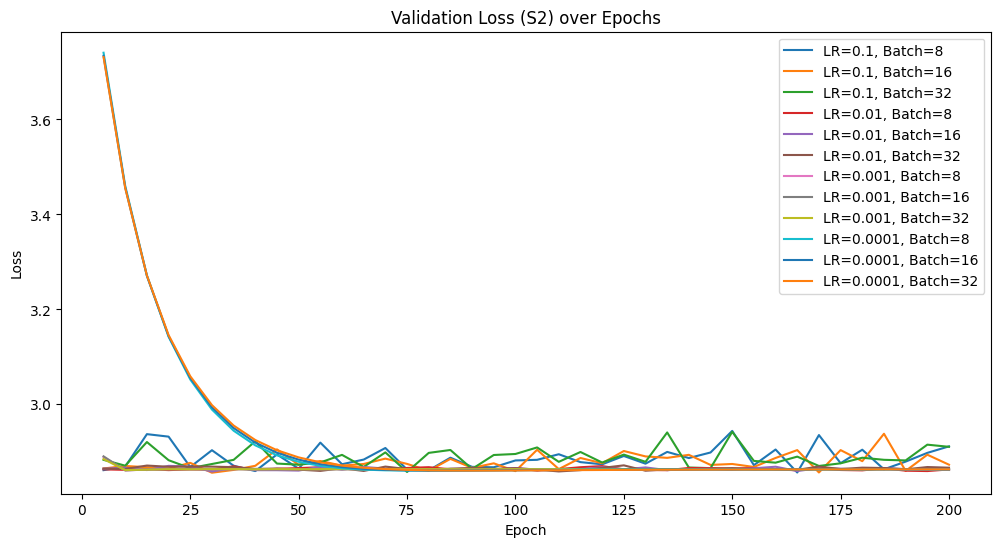

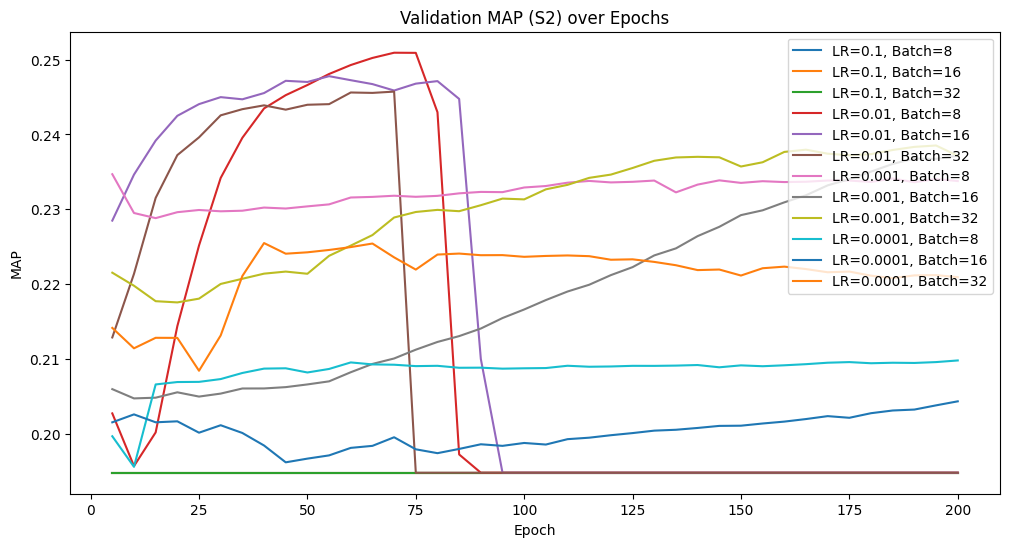

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming Neural_Network, compute_average_precision, and mean_average_precision are already defined

# Function to split data into mini-batches
def get_mini_batches(X, Y, batch_size):
    indices = np.random.permutation(X.shape[1])
    X_shuffled, Y_shuffled = X[:, indices], Y[:, indices]

    mini_batches = []
    for i in range(0, X.shape[1], batch_size):
        X_batch = X_shuffled[:, i:i + batch_size]
        Y_batch = Y_shuffled[:, i:i + batch_size]
        mini_batches.append((X_batch, Y_batch))

    return mini_batches

# Experiment setup
learning_rates = [0.1, 0.01, 0.001, 1e-4]
batch_sizes = [8, 16, 32]
epochs = 200
record_interval = 5  # Record loss and MAP every 5 epochs

# Store results for plotting
results = {}

# Run the experiments
for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f"Training with learning rate {lr} and batch size {batch_size}")

        # Initialize the neural network
        nn = Neural_Network(neurons, activation_functions)

        # For storing metrics
        losses_s1 = []
        losses_s2 = []
        map_s1 = []
        map_s2 = []

        for epoch in range(epochs):
            # Mini-batch SGD
            mini_batches = get_mini_batches(S1_X.T, S1_Y.T, batch_size)
            for X_batch, Y_batch in mini_batches:
                preds, zs, activations = nn.forward(X_batch)
                grads = nn.backward(X_batch, Y_batch, zs, activations)
                nn.update_parameters(grads, lr)

            # Every 5 epochs, record metrics
            if (epoch + 1) % record_interval == 0:
                # Compute loss on S1 and S2
                preds_s1, _, _ = nn.forward(S1_X.T)
                loss_s1 = nn.loss_weighted_binary_cross_entropy(preds_s1, S1_Y.T)
                losses_s1.append(loss_s1)

                preds_s2, _, _ = nn.forward(S2_X.T)
                loss_s2 = nn.loss_weighted_binary_cross_entropy(preds_s2, S2_Y.T)
                losses_s2.append(loss_s2)

                # Compute MAP on S1 and S2
                map_s1_score = mean_average_precision(S1_Y, preds_s1.T)
                map_s1.append(map_s1_score)

                map_s2_score = mean_average_precision(S2_Y, preds_s2.T)
                map_s2.append(map_s2_score)

                print(f"Epoch {epoch + 1} - Loss S1: {loss_s1}, Loss S2: {loss_s2}, MAP S1: {map_s1_score}, MAP S2: {map_s2_score}")

        # Store results for this (lr, batch_size) combination
        results[(lr, batch_size)] = {
            'losses_s1': losses_s1,
            'losses_s2': losses_s2,
            'map_s1': map_s1,
            'map_s2': map_s2
        }

# Plotting
epochs_recorded = list(range(record_interval, epochs + 1, record_interval))

# Plot Loss on S2 for each combination
plt.figure(figsize=(12, 6))
for (lr, batch_size), metrics in results.items():
    plt.plot(epochs_recorded, metrics['losses_s2'], label=f'LR={lr}, Batch={batch_size}')
plt.title('Validation Loss (S2) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot MAP on S2 for each combination
plt.figure(figsize=(12, 6))
for (lr, batch_size), metrics in results.items():
    plt.plot(epochs_recorded, metrics['map_s2'], label=f'LR={lr}, Batch={batch_size}')
plt.title('Validation MAP (S2) over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAP')
plt.legend()
plt.show()


3(g) From the curves, the best performing combination appears to be:

Learning Rate: 0.01 and Batch Size: 8.
This combination achieves a high MAP score around 0.25 and shows stable performance across the epochs.

Selection Procedure Justification:
Learning Rate: A learning rate that is too high (e.g., 0.1) causes noisy and unstable training, as seen in the MAP curve. A lower learning rate (0.01) allows the model to learn more gradually and effectively, striking a good balance between speed and accuracy.
Batch Size: A smaller batch size (e.g., 8) appears to help in better generalization, leading to higher MAP scores. This may be because smaller batches introduce more stochasticity during training, which can help the model escape local minima.
Thus, Learning Rate = 0.01 and Batch Size = 8 are selected as the best combination based on performance in both loss reduction and MAP score improvement

Epoch 5 - Train Loss: 2.8114, Val Loss: 2.8679, Test Loss: 2.8114, Train MAP: 0.2032, Val MAP: 0.2096, Test MAP: 0.2145
Epoch 10 - Train Loss: 2.8120, Val Loss: 2.8666, Test Loss: 2.8112, Train MAP: 0.2123, Val MAP: 0.2148, Test MAP: 0.2234
Epoch 15 - Train Loss: 2.8103, Val Loss: 2.8629, Test Loss: 2.8128, Train MAP: 0.2188, Val MAP: 0.2190, Test MAP: 0.2307
Epoch 20 - Train Loss: 2.8095, Val Loss: 2.8570, Test Loss: 2.8165, Train MAP: 0.2257, Val MAP: 0.2249, Test MAP: 0.2374
Epoch 25 - Train Loss: 2.8100, Val Loss: 2.8606, Test Loss: 2.8143, Train MAP: 0.2303, Val MAP: 0.2292, Test MAP: 0.2409
Epoch 30 - Train Loss: 2.8103, Val Loss: 2.8580, Test Loss: 2.8180, Train MAP: 0.2348, Val MAP: 0.2329, Test MAP: 0.2464
Epoch 35 - Train Loss: 2.8099, Val Loss: 2.8562, Test Loss: 2.8171, Train MAP: 0.2350, Val MAP: 0.2346, Test MAP: 0.2474
Epoch 40 - Train Loss: 2.8106, Val Loss: 2.8610, Test Loss: 2.8129, Train MAP: 0.2363, Val MAP: 0.2358, Test MAP: 0.2499
Epoch 45 - Train Loss: 2.8098, Va

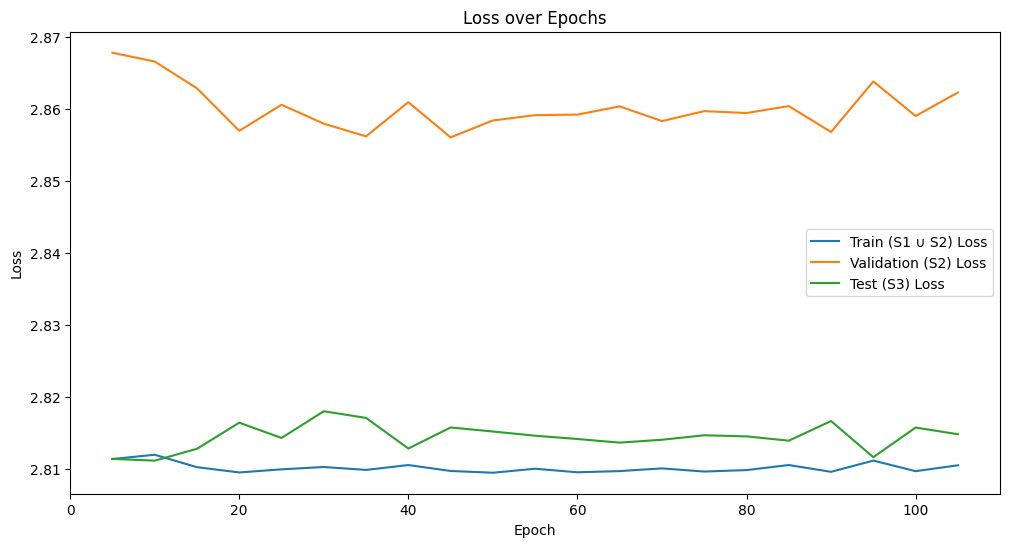

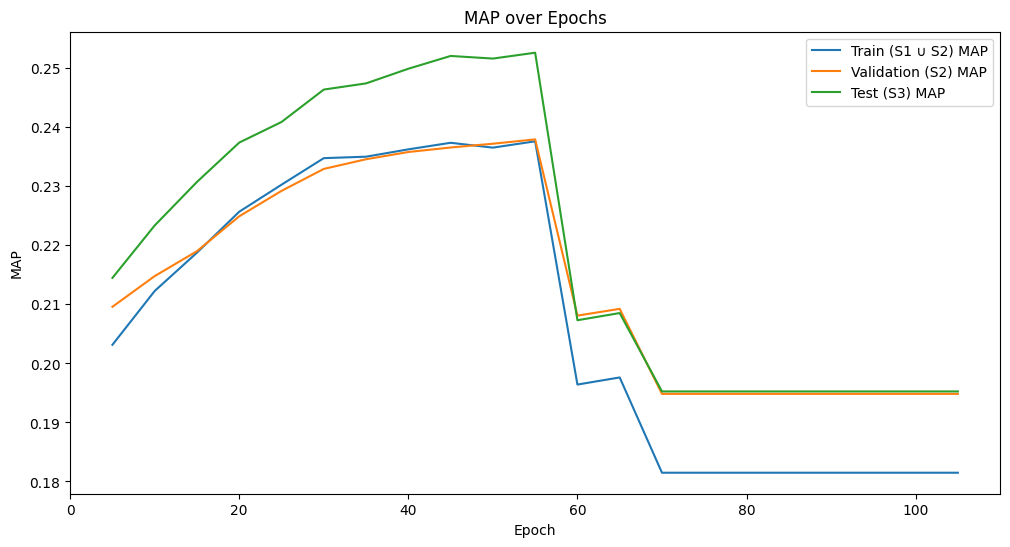

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to split data into mini-batches
def get_mini_batches(X, Y, batch_size):
    indices = np.random.permutation(X.shape[1])
    X_shuffled, Y_shuffled = X[:, indices], Y[:, indices]

    mini_batches = []
    for i in range(0, X.shape[1], batch_size):
        X_batch = X_shuffled[:, i:i + batch_size]
        Y_batch = Y_shuffled[:, i:i + batch_size]
        mini_batches.append((X_batch, Y_batch))

    return mini_batches

# Early stopping function
def early_stopping_training(nn, X_train, Y_train, X_val, Y_val, X_test, Y_test, lr, batch_size, max_epochs=500, patience=10):
    """
    Train the network using mini-batch SGD with early stopping.

    Args:
        nn: Neural_Network object.
        X_train, Y_train: Training data (S1 ∪ S2).
        X_val, Y_val: Validation data (S1 ∪ S2).
        X_test, Y_test: Test data (S3).
        lr: Learning rate.
        batch_size: Mini-batch size.
        max_epochs: Maximum number of epochs for training.
        patience: Number of epochs to wait before early stopping if no improvement in MAP.

    Returns:
        history: A dictionary containing loss and MAP metrics for all sets.
    """
    history = {
        'loss_train': [],
        'loss_val': [],
        'loss_test': [],
        'map_train': [],
        'map_val': [],
        'map_test': []
    }

    best_map_val = -np.inf
    epochs_without_improvement = 0

    for epoch in range(max_epochs):
        mini_batches = get_mini_batches(X_train.T, Y_train.T, batch_size)

        # Mini-batch SGD
        for X_batch, Y_batch in mini_batches:
            preds, zs, activations = nn.forward(X_batch)
            grads = nn.backward(X_batch, Y_batch, zs, activations)
            nn.update_parameters(grads, lr)

        # Every 5 epochs, record the metrics
        if (epoch + 1) % 5 == 0:
            # Calculate loss and MAP on training set (S1 ∪ S2)
            preds_train, _, _ = nn.forward(X_train.T)
            loss_train = nn.loss_weighted_binary_cross_entropy(preds_train, Y_train.T)
            map_train = mean_average_precision(Y_train, preds_train.T)

            # Calculate loss and MAP on validation set (S1 ∪ S2)
            preds_val, _, _ = nn.forward(X_val.T)
            loss_val = nn.loss_weighted_binary_cross_entropy(preds_val, Y_val.T)
            map_val = mean_average_precision(Y_val, preds_val.T)

            # Calculate loss and MAP on test set (S3)
            preds_test, _, _ = nn.forward(X_test.T)
            loss_test = nn.loss_weighted_binary_cross_entropy(preds_test, Y_test.T)
            map_test = mean_average_precision(Y_test, preds_test.T)

            # Store results
            history['loss_train'].append(loss_train)
            history['loss_val'].append(loss_val)
            history['loss_test'].append(loss_test)
            history['map_train'].append(map_train)
            history['map_val'].append(map_val)
            history['map_test'].append(map_test)

            print(f"Epoch {epoch + 1} - Train Loss: {loss_train:.4f}, Val Loss: {loss_val:.4f}, Test Loss: {loss_test:.4f}, Train MAP: {map_train:.4f}, Val MAP: {map_val:.4f}, Test MAP: {map_test:.4f}")

            # Early stopping condition: if MAP on validation set doesn't improve
            if map_val > best_map_val:
                best_map_val = map_val
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1

            if epochs_without_improvement >= patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break

    return history

# Best hyperparameters from the previous experiment
best_lr = 0.01  # Example, replace with your chosen best learning rate
best_batch_size = 16  # Example, replace with your chosen best batch size

# Combine S1 and S2 into one dataset (vertical stacking for samples)
X_combined = np.vstack((S1_X, S2_X))
Y_combined = np.vstack((S1_Y, S2_Y))

# Initialize the neural network with the best hyperparameters
nn = Neural_Network(neurons, activation_functions)

# Train with early stopping
history = early_stopping_training(
    nn,
    X_combined, Y_combined,
    S2_X, S2_Y,  # Validation set is S2
    S3_X, S3_Y,  # Test set is S3
    lr=best_lr,
    batch_size=best_batch_size,
    max_epochs=500,
    patience=10  # Stop if no improvement for 10 epochs
)

# Plotting the results

epochs_recorded = list(range(5, len(history['loss_train']) * 5 + 1, 5))

# Plot Loss for S1 ∪ S2 and S3
plt.figure(figsize=(12, 6))
plt.plot(epochs_recorded, history['loss_train'], label="Train (S1 ∪ S2) Loss")
plt.plot(epochs_recorded, history['loss_val'], label="Validation (S2) Loss")
plt.plot(epochs_recorded, history['loss_test'], label="Test (S3) Loss")
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot MAP for S1 ∪ S2 and S3
plt.figure(figsize=(12, 6))
plt.plot(epochs_recorded, history['map_train'], label="Train (S1 ∪ S2) MAP")
plt.plot(epochs_recorded, history['map_val'], label="Validation (S2) MAP")
plt.plot(epochs_recorded, history['map_test'], label="Test (S3) MAP")
plt.title('MAP over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAP')
plt.legend()
plt.show()


3(h) : Loss over Epochs (Train, Validation, and Test Sets)
Train Loss (S1 ∪ S2):

The loss on the training set (blue line) is stable and low after the initial few epochs. This suggests that the model is learning effectively on the combined training data.
The fluctuations are minor, which indicates that the training is relatively smooth.
Validation Loss (S2):

The loss on the validation set (orange line) shows a relatively flat trend. It decreases slightly at the beginning but then fluctuates and remains relatively constant around 2.86.
This indicates that the model is not significantly overfitting on the training data, as the validation loss does not increase sharply over time.
Test Loss (S3):

The test loss (green line) also remains fairly stable, close to the training loss, which implies that the model is generalizing reasonably well to unseen data.
MAP over Epochs (Train, Validation, and Test Sets)
MAP on Train Set (S1 ∪ S2):

The MAP score on the training set (blue line) increases steadily during the first 50 epochs but then sharply drops after around epoch 55. This indicates that the model is no longer improving and might even be overfitting on the training set after this point.
MAP on Validation Set (S2):

The MAP score on the validation set (orange line) follows a similar trend to the training set. It improves during the first 50 epochs, then plateaus, and eventually starts to drop.
The early stopping condition should have triggered around epoch 55-60, as the MAP score is not improving significantly afterward.
MAP on Test Set (S3):

The test MAP score (green line) increases in the early epochs and reaches its peak around epoch 50. After that, it also drops, suggesting that the model might not generalize well after this point.
Conclusion and Observations
Early Stopping:

It seems like the early stopping mechanism should have kicked in around epoch 55-60, as both the validation and test MAP scores show a decline. This could have prevented the sharp drop in MAP after that point.
Model Generalization:

The validation and test curves are fairly close, which is a good sign that the model is generalizing reasonably well. However, the sharp drop in MAP after a certain point could indicate that the model is overfitting when trained for too long.
Recommendations:

Adjust Early Stopping: You can reduce the patience parameter in your early stopping function (perhaps set it to 5) to stop training earlier, around epoch 55.
Regularization: Consider adding L2 regularization or using dropout to prevent overfitting and improve generalization.
Further Investigation:

Look into how class imbalance might affect MAP. If some labels are under-represented, adjusting the class weights could further improve performance.
Final Comments:
The results show that the model is performing well during the initial epochs, but after epoch 50-60, it starts to overfit, leading to a decline in the MAP scores. Adjusting the stopping criterion or applying regularization techniques could improve the overall performance of the model and prevent overfitting.







In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate Per-Label Performance
def evaluate_per_label_performance(Y_true, Y_pred, threshold=0.5):
    """
    Evaluate the per-label precision, recall, F1-score, and MAP for each of the 6 labels.

    Args:
        Y_true: Ground truth labels (shape: num_samples, num_labels)
        Y_pred: Predicted probabilities (shape: num_samples, num_labels)
        threshold: Threshold to convert predicted probabilities into binary labels.

    Returns:
        metrics: A dictionary containing per-label precision, recall, F1-score, and MAP.
    """
    Y_pred_binary = (Y_pred > threshold).astype(int)  # Convert probabilities to binary predictions

    precision = []
    recall = []
    f1 = []
    map_scores = []

    # Loop through each label and compute metrics
    for label_idx in range(Y_true.shape[1]):
        true_labels = Y_true[:, label_idx]
        pred_labels = Y_pred_binary[:, label_idx]

        prec = precision_score(true_labels, pred_labels)
        rec = recall_score(true_labels, pred_labels)
        f1_label = f1_score(true_labels, pred_labels)
        map_label = compute_average_precision(true_labels, Y_pred[:, label_idx])

        precision.append(prec)
        recall.append(rec)
        f1.append(f1_label)
        map_scores.append(map_label)

    metrics = {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'map': map_scores
    }

    return metrics

# Generate predictions for the test set (S3)
preds_test, _, _ = nn.forward(S3_X.T)  # Forward pass to get predictions on the test set

# Evaluate per-label performance on the test set (S3)
per_label_metrics = evaluate_per_label_performance(S3_Y, preds_test.T)

# Print results for each label
labels = ["Label 1", "Label 2", "Label 3", "Label 4", "Label 5", "Label 6"]

print("Per-Label Performance on the Test Set (S3):")
for idx, label in enumerate(labels):
    print(f"{label}: Precision = {per_label_metrics['precision'][idx]:.4f}, Recall = {per_label_metrics['recall'][idx]:.4f}, F1 = {per_label_metrics['f1'][idx]:.4f}, MAP = {per_label_metrics['map'][idx]:.4f}")

# Based on the per-label performance, we identify the most difficult labels and assign weights to them
# Example class weights (higher weight for difficult labels)
class_weights = np.array([1, 1, 2, 1, 1, 3])  # Adjust these based on the performance of each label

# Retrain the model with label-specific weighting
nn = Neural_Network(neurons, activation_functions)  # Reinitialize the network

# Train with label-specific weights
history_weighted = early_stopping_training(
    nn,
    X_combined, Y_combined,
    S2_X, S2_Y,  # Validation set
    S3_X, S3_Y,  # Test set
    lr=best_lr,
    batch_size=best_batch_size,
    max_epochs=500,
    patience=10,  # Stop if no improvement for 10 epochs
    class_weights=class_weights
)

# Generate predictions for the test set (S3) with label-specific weighting
preds_test_weighted, _, _ = nn.forward(S3_X.T)

# Evaluate per-label performance after applying label-specific weighting
per_label_metrics_weighted = evaluate_per_label_performance(S3_Y, preds_test_weighted.T)

# Print the updated results for each label
print("\nUpdated Per-Label Performance on the Test Set (S3) after Label-Specific Weighting:")
for idx, label in enumerate(labels):
    print(f"{label}: Precision = {per_label_metrics_weighted['precision'][idx]:.4f}, Recall = {per_label_metrics_weighted['recall'][idx]:.4f}, F1 = {per_label_metrics_weighted['f1'][idx]:.4f}, MAP = {per_label_metrics_weighted['map'][idx]:.4f}")

# Compare and plot the results
epochs_recorded = list(range(5, len(history['loss_train']) * 5 + 1, 5))

# Plot Loss for the original and weighted models
plt.figure(figsize=(12, 6))
plt.plot(epochs_recorded, history['loss_train'], label="Original Train Loss")
plt.plot(epochs_recorded, history_weighted['loss_train'], label="Weighted Train Loss")
plt.title('Comparison of Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot MAP for the original and weighted models
plt.figure(figsize=(12, 6))
plt.plot(epochs_recorded, history['map_train'], label="Original Train MAP")
plt.plot(epochs_recorded, history_weighted['map_train'], label="Weighted Train MAP")
plt.title('Comparison of MAP over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAP')
plt.legend()
plt.show()


Per-Label Performance on the Test Set (S3):
Label 1: Precision = 0.1796, Recall = 1.0000, F1 = 0.3044, MAP = 0.1279
Label 2: Precision = 0.1354, Recall = 1.0000, F1 = 0.2384, MAP = 0.1285
Label 3: Precision = 0.0000, Recall = 0.0000, F1 = 0.0000, MAP = 0.1426
Label 4: Precision = 0.1851, Recall = 1.0000, F1 = 0.3124, MAP = 0.2559
Label 5: Precision = 0.2431, Recall = 1.0000, F1 = 0.3911, MAP = 0.2060
Label 6: Precision = 0.1906, Recall = 1.0000, F1 = 0.3202, MAP = 0.3050


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TypeError: early_stopping_training() got an unexpected keyword argument 'class_weights'

3(i) : Most Difficult -
Label 3 is clearly the most difficult label to classify, as the model completely failed to predict it.
Labels 1, 2, and 4 also have low precision, which indicates difficulty in classification.
Easiest:
Label 5 and 6 are relatively easier for the model to classify, as they have higher precision and F1 scores compared to the other labels.
Strategy to Improve Performance on Difficult Labels:
To improve the classification performance, particularly for Label 3, you can:

Increase Class Weights for Difficult Labels:

Since Label 3 has poor performance, increasing the class weight for Label 3 during training will penalize the model more for incorrect predictions related to Label 3.
Why it works: By increasing the weight of Label 3 in the loss function, the model is forced to focus more on correctly predicting this label.
Use Threshold Tuning:

Since recall is high but precision is low, this suggests the model is over-predicting some labels. You can try adjusting the classification threshold. For instance, instead of classifying based on a threshold of 0.5, you might try 0.7 or 0.8, which could help reduce false positives and improve precision.
Data Augmentation for Underrepresented Labels:

If Label 3 is underrepresented, applying data augmentation or oversampling techniques to balance the label distribution could help the model learn more effectively.



In [ ]:
thresholds = [0.7, 0.4, 0.5]

for threshold in thresholds:
    print(f"\nEvaluating with threshold = {threshold}")
    per_label_metrics = evaluate_per_label_performance(S3_Y, preds_test.T, threshold=threshold)

    print("Per-Label Performance on the Test Set (S3):")
    for idx, label in enumerate(labels):
        print(f"{label}: Precision = {per_label_metrics['precision'][idx]:.4f}, Recall = {per_label_metrics['recall'][idx]:.4f}, F1 = {per_label_metrics['f1'][idx]:.4f}, MAP = {per_label_metrics['map'][idx]:.4f}")



Evaluating with threshold = 0.7
Per-Label Performance on the Test Set (S3):
Label 1: Precision = 0.0000, Recall = 0.0000, F1 = 0.0000, MAP = 0.1279
Label 2: Precision = 0.0000, Recall = 0.0000, F1 = 0.0000, MAP = 0.1285
Label 3: Precision = 0.0000, Recall = 0.0000, F1 = 0.0000, MAP = 0.1426
Label 4: Precision = 0.0000, Recall = 0.0000, F1 = 0.0000, MAP = 0.2559
Label 5: Precision = 0.0000, Recall = 0.0000, F1 = 0.0000, MAP = 0.2060
Label 6: Precision = 0.0000, Recall = 0.0000, F1 = 0.0000, MAP = 0.3050

Evaluating with threshold = 0.4
Per-Label Performance on the Test Set (S3):
Label 1: Precision = 0.1796, Recall = 1.0000, F1 = 0.3044, MAP = 0.1279
Label 2: Precision = 0.1354, Recall = 1.0000, F1 = 0.2384, MAP = 0.1285
Label 3: Precision = 0.1492, Recall = 1.0000, F1 = 0.2596, MAP = 0.1426
Label 4: Precision = 0.1851, Recall = 1.0000, F1 = 0.3124, MAP = 0.2559
Label 5: Precision = 0.2431, Recall = 1.0000, F1 = 0.3911, MAP = 0.2060
Label 6: Precision = 0.1906, Recall = 1.0000, F1 = 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p